# 🌳 Trees
The trees data ranks each neighborhood by how beneficial its trees are (in dollar value) to four different factors:
- Stormwater Benefits
- Property Value
- Electricity Benefits
- Air Quality Value

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import data from csv
t = pd.read_csv("data/trees_data.csv")
trees = t.iloc[:,[48,3,15,16,17,19,20,37,38,39,47]].dropna().sort_values("neighborhood") #isolate just the columns I care about into one dataframe.
trees.head(10)

C:\Users\hunte\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,neighborhood,common_name,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,overall_benefits_dollar_value
32072,Allegheny Center,Ginkgo,12.683000,1585.374960,58.142100,13.999165,52.862601,11.274586,2.350492,1.387450,150.348902
32340,Allegheny Center,Oak: Pin,22.067105,2758.388097,90.736693,20.543994,69.790648,15.608748,3.203296,2.285870,221.033059
32339,Allegheny Center,Oak: Pin,6.699391,837.423843,57.028955,7.162698,26.686144,5.041264,1.045038,0.750016,103.368467
32338,Allegheny Center,Oak: Pin,6.699391,837.423843,57.028955,7.162698,26.686144,5.041264,1.045038,0.750016,103.368467
32337,Allegheny Center,Honeylocust: Thornless,24.245188,3030.648510,118.394322,21.801985,78.366246,16.406774,3.376422,1.721132,260.935647
32336,Allegheny Center,Maple: Norway,15.141617,1892.702165,84.564162,16.514168,63.117320,12.412174,2.558153,2.173950,193.923392
32335,Allegheny Center,Maple: Norway,12.134547,1516.818404,69.909141,15.024900,54.867465,10.686449,2.213377,1.734513,164.357015
32333,Allegheny Center,Maple: Norway,8.317154,1039.644231,65.024134,14.528478,52.117514,6.483089,1.317777,0.968313,147.438681
32332,Allegheny Center,Sycamore: American,39.447369,4930.921139,95.708800,30.453530,99.004583,26.696681,5.500751,3.338626,294.649589
32331,Allegheny Center,Linden: American,35.001493,4375.186618,21.556700,25.769106,86.216872,19.290425,3.966550,1.469043,189.303639


In [3]:
#How many trees are in each neighborhood?
treesPerNeighborhood = {}

for r in range(len(trees)) :
    neighborhood = trees.iloc[r,0]
    
    try :
        treesPerNeighborhood[neighborhood] += 1
    except :
        treesPerNeighborhood[neighborhood] = 1
        
#for x in treesPerNeighborhood :
#    print(str(x) + " " + str(treesPerNeighborhood[x]))

In [4]:
#Isolate each unique neighborhood
n = trees["neighborhood"].unique().tolist()

#change neighborhood column in dataframe to the indicies
for thing in n :
    trees = trees.replace([thing], n.index(thing))

,neighborhood,common_name,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,overall_benefits_dollar_value
32072,0,Ginkgo,12.683000,1585.374960,58.142100,13.999165,52.862601,11.274586,2.350492,1.387450,150.348902
32340,0,Oak: Pin,22.067105,2758.388097,90.736693,20.543994,69.790648,15.608748,3.203296,2.285870,221.033059
32339,0,Oak: Pin,6.699391,837.423843,57.028955,7.162698,26.686144,5.041264,1.045038,0.750016,103.368467
32338,0,Oak: Pin,6.699391,837.423843,57.028955,7.162698,26.686144,5.041264,1.045038,0.750016,103.368467
32337,0,Honeylocust: Thornless,24.245188,3030.648510,118.394322,21.801985,78.366246,16.406774,3.376422,1.721132,260.935647
32336,0,Maple: Norway,15.141617,1892.702165,84.564162,16.514168,63.117320,12.412174,2.558153,2.173950,193.923392
32335,0,Maple: Norway,12.134547,1516.818404,69.909141,15.024900,54.867465,10.686449,2.213377,1.734513,164.357015
32333,0,Maple: Norway,8.317154,1039.644231,65.024134,14.528478,52.117514,6.483089,1.317777,0.968313,147.438681
32332,0,Sycamore: American,39.447369,4930.921139,95.708800,30.453530,99.004583,26.696681,5.500751,3.338626,294.649589
32331,0,Linden: American,35.001493,4375.186618,21.556700,25.769106,86.216872,19.290425,3.966550,1.469043,189.303639


In [5]:
#Function to collect all of the values in a certain column for each neighborhood.
def statsGrab(c, df) :
    statList = []
    stat = 0
    index = 0
    for r in range (len(df)) :
        if (df.iloc[r,0] == index) :
            stat += float(df.iloc[r,c])
        else :
            statList.append(stat)
            index+=1
            stat = float(df.iloc[r,c])
    statList.append(stat)
    return statList

stormValue = statsGrab(2, trees) #Isolate column 2 with storm value dollar benefits
propValue = statsGrab(4, trees) #Isolate column 4 with property value benefits
elecValue = statsGrab(5, trees) #Isolate column 5 with electricity value benefits
airValue = statsGrab(7, trees) #Isolates column 7 with air quality value benefits

In [6]:
#the data is in the wrong orientation for a dataframe. Time to rework it...
index = []
scoresList = [[]]
for i in range(90) :  
    index.append(i)
    
    scoresList[i].append(n[i])
    scoresList[i].append(stormValue[i])
    scoresList[i].append(propValue[i])
    scoresList[i].append(elecValue[i])
    scoresList[i].append(airValue[i])
    
    scoresList.insert(i+1, [])
    
del scoresList[90]
    
scores = pd.DataFrame(scoresList,
                      columns = ['Neighborhood', 'Stormwater Benefits', 'Property Value', 'Electric Benefits', 'Air Quality Benefits'], index=index)

scores

,Neighborhood,Stormwater Benefits,Property Value,Electric Benefits,Air Quality Benefits
0,Allegheny Center,15178.511842,57963.126001,14193.463380,10723.002809
1,Allegheny West,5365.137916,22959.330812,5022.063352,3764.227070
2,Allentown,526.717770,3318.198878,622.094573,427.768002
3,Arlington,389.313250,2666.422788,498.892450,301.765273
4,Arlington Heights,79.176047,330.289204,92.492976,43.677589
...,...,...,...,...,...
85,Upper Lawrenceville,2191.535869,19677.196016,2474.420848,1831.984740
86,West End,525.474322,5434.736234,555.482402,434.194246
87,West Oakland,235.535630,3312.210640,322.171889,196.237780
88,Westwood,3058.061442,12383.676820,3131.185839,1936.210446


# Let's look at the data!

Below are 4 charts, one for each of the 4 metrics pulled from this data set to measure neighborhood quality. After reviewing the data, we can numerically sort and "place" each neighborhood. These placements will be added up, and the neighborhood with the lowest score will win!

## Stormwater Benefits

<AxesSubplot:xlabel='Neighborhood'>

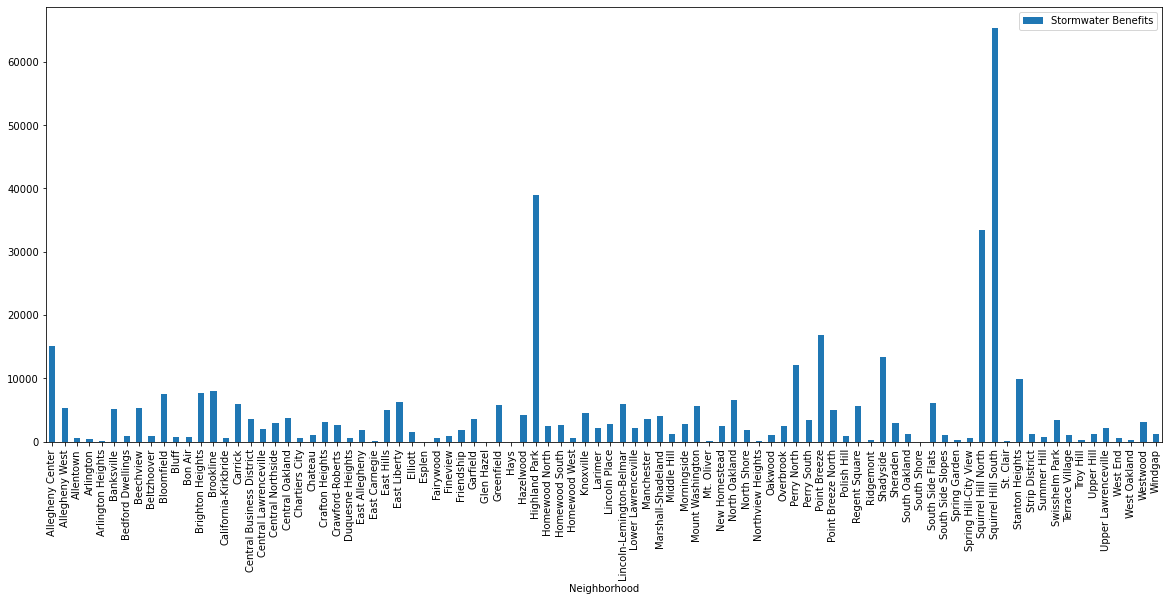

In [7]:
scores.iloc[:,[0,1]].plot.bar(x="Neighborhood", figsize=(20,8))

## Property Value Benefits

<AxesSubplot:xlabel='Neighborhood'>

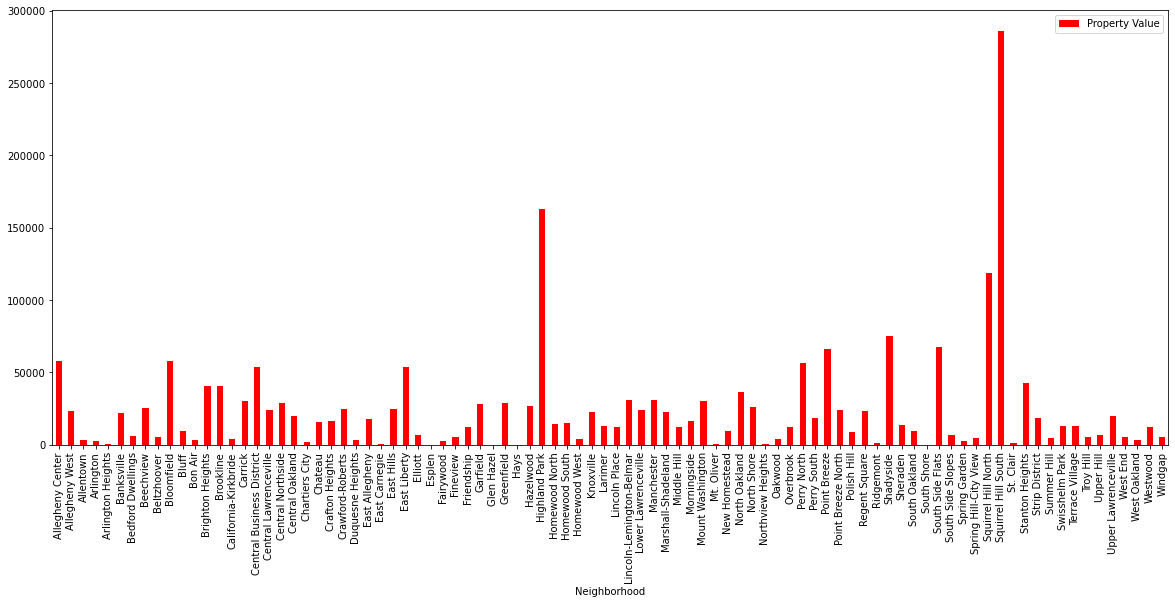

In [8]:
scores.iloc[:,[0,2]].plot.bar(x='Neighborhood', figsize=(20,8), color='red')

## Electricity Benefits

<AxesSubplot:xlabel='Neighborhood'>

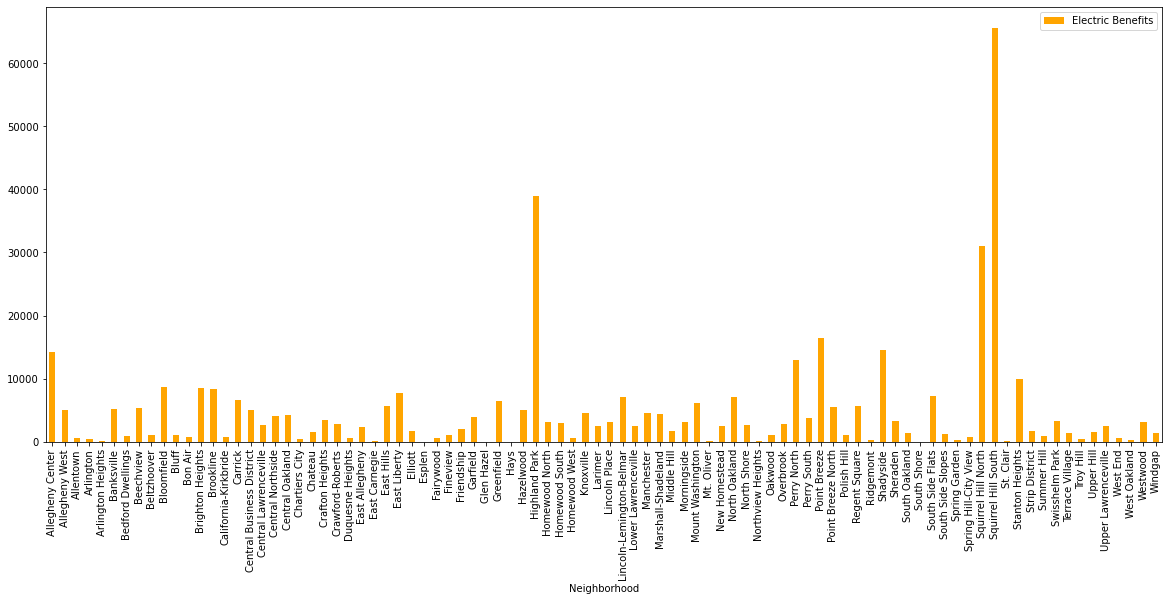

In [9]:
scores.iloc[:,[0,3]].plot.bar(x='Neighborhood', figsize=(20,8), color='orange')

## Air Quality Benefits

<AxesSubplot:xlabel='Neighborhood'>

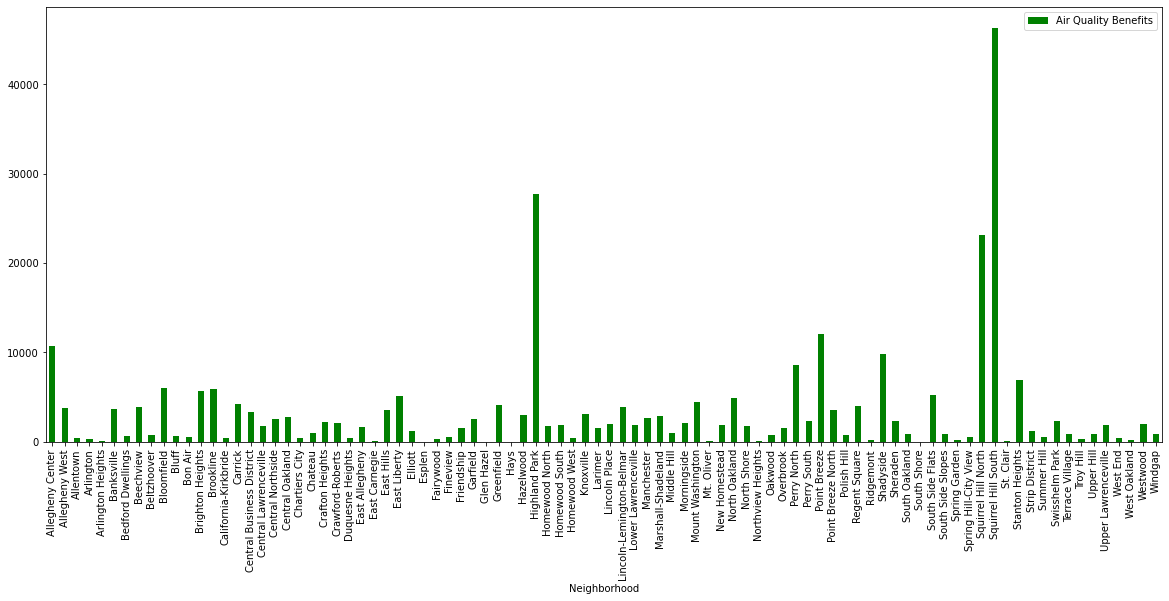

In [10]:
scores.iloc[:,[0,4]].plot.bar(x='Neighborhood', figsize=(20,8), color='green')

## Data Reflection
The shape of these graphs are all fairly similar, and it is obvious that the same neighborhoods are coming out on top in each area. But let's rank them and total it all up to see which one wins!

# The Ranking

In [11]:
stormRank = []
propRank = []
elecRank = []
airRank = []

for r in range(90) :
    stormRank.append(0)
    propRank.append(0)
    elecRank.append(0)
    airRank.append(0)

In [12]:
#sort each of the sheets by the values (lowest to highest)
sScores = scores.sort_values("Stormwater Benefits")
pScores = scores.sort_values("Property Value")
eScores = scores.sort_values("Electric Benefits")
aScores = scores.sort_values("Air Quality Benefits")

for r in range(90) : #assign ranks with 90 at the lowest and 1 at the highest dollar value
    i = sScores.index.tolist()
    stormRank[i[r]] = (90-r)
    
    i = pScores.index.tolist()
    propRank[i[r]] = (90-r)
    
    i = eScores.index.tolist()
    elecRank[i[r]] = (90-r)
    
    i = aScores.index.tolist()
    airRank[i[r]] = (90-r)

In [13]:
#Once again, the data is in the wrong orientation for a dataframe, but I want to plot it before determining final scores.
index = []
scoresList = [[]]
for i in range(90) :  
    index.append(i)
    
    scoresList[i].append(n[i])
    scoresList[i].append(stormRank[i])
    scoresList[i].append(propRank[i])
    scoresList[i].append(elecRank[i])
    scoresList[i].append(airRank[i])
    
    scoresList.insert(i+1, [])
    
del scoresList[90]
    
rank = pd.DataFrame(scoresList,
                      columns = ['Neighborhood', 'Stormwater Rank', 'Property Rank', 'Electric Rank', 'Air Quality Rank'], index=index)

rank

,Neighborhood,Stormwater Rank,Property Rank,Electric Rank,Air Quality Rank
0,Allegheny Center,5,8,6,5
1,Allegheny West,20,32,25,21
2,Allentown,73,75,71,72
3,Arlington,77,77,77,77
4,Arlington Heights,84,85,84,84
...,...,...,...,...,...
85,Upper Lawrenceville,46,36,48,44
86,West End,74,65,75,71
87,West Oakland,80,76,81,79
88,Westwood,35,54,37,39


Here's how each neighborhood ranks! The smaller the bar, the better the rank.

<AxesSubplot:xlabel='Neighborhood'>

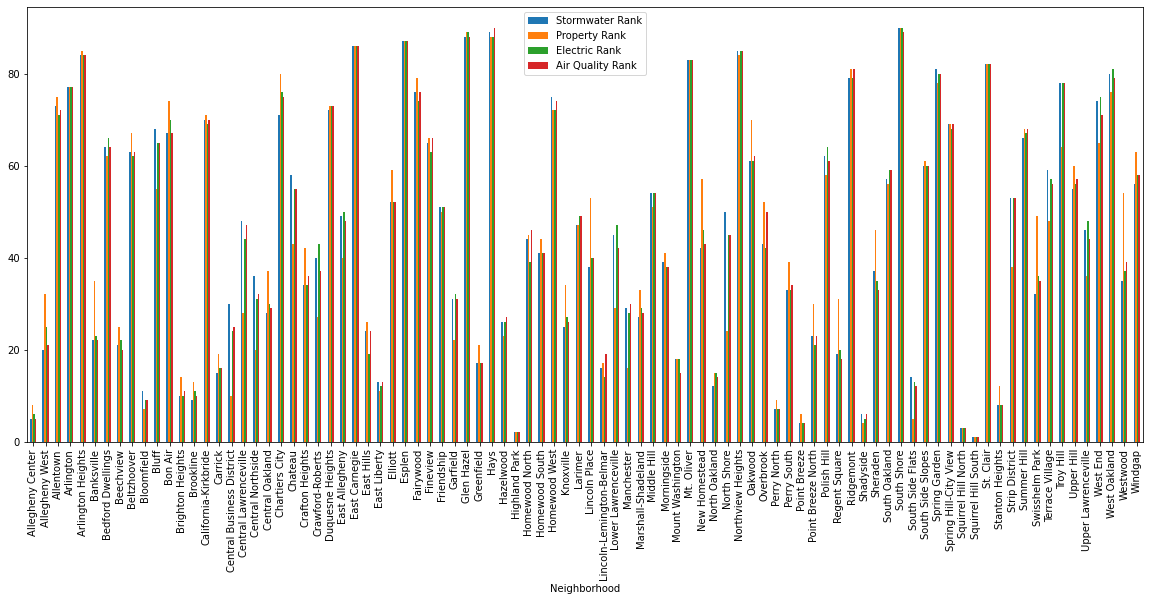

In [14]:
rank.plot.bar(x='Neighborhood', figsize=(20,8))

Let's look at the individual top ten!

## Stormwater Rank

In [15]:
rank.iloc[:,[0,1]].sort_values("Stormwater Rank").head(10)

,Neighborhood,Stormwater Rank
76,Squirrel Hill South,1
39,Highland Park,2
75,Squirrel Hill North,3
62,Point Breeze,4
0,Allegheny Center,5
67,Shadyside,6
60,Perry North,7
78,Stanton Heights,8
13,Brookline,9
12,Brighton Heights,10


## Property Value Rank

In [16]:
rank.iloc[:,[0,2]].sort_values("Property Rank").head(10)

,Neighborhood,Property Rank
76,Squirrel Hill South,1
39,Highland Park,2
75,Squirrel Hill North,3
67,Shadyside,4
71,South Side Flats,5
62,Point Breeze,6
9,Bloomfield,7
0,Allegheny Center,8
60,Perry North,9
16,Central Business District,10


## Electric Benefit Rank

In [17]:
rank.iloc[:,[0,3]].sort_values("Electric Rank").head(10)

,Neighborhood,Electric Rank
76,Squirrel Hill South,1
39,Highland Park,2
75,Squirrel Hill North,3
62,Point Breeze,4
67,Shadyside,5
0,Allegheny Center,6
60,Perry North,7
78,Stanton Heights,8
9,Bloomfield,9
12,Brighton Heights,10


## Air Quality Benefit Rank

In [18]:
rank.iloc[:,[0,4]].sort_values("Air Quality Rank").head(10)

,Neighborhood,Air Quality Rank
76,Squirrel Hill South,1
39,Highland Park,2
75,Squirrel Hill North,3
62,Point Breeze,4
0,Allegheny Center,5
67,Shadyside,6
60,Perry North,7
78,Stanton Heights,8
9,Bloomfield,9
13,Brookline,10


Now, to add up the scores!

In [19]:
nRank = []
for r in range(90) :
    rankSum = stormRank[r] + propRank[r] + elecRank[r] + airRank[r]
    nRank.append(rankSum)

# The Final Ranking

<AxesSubplot:xlabel='Neighborhood'>

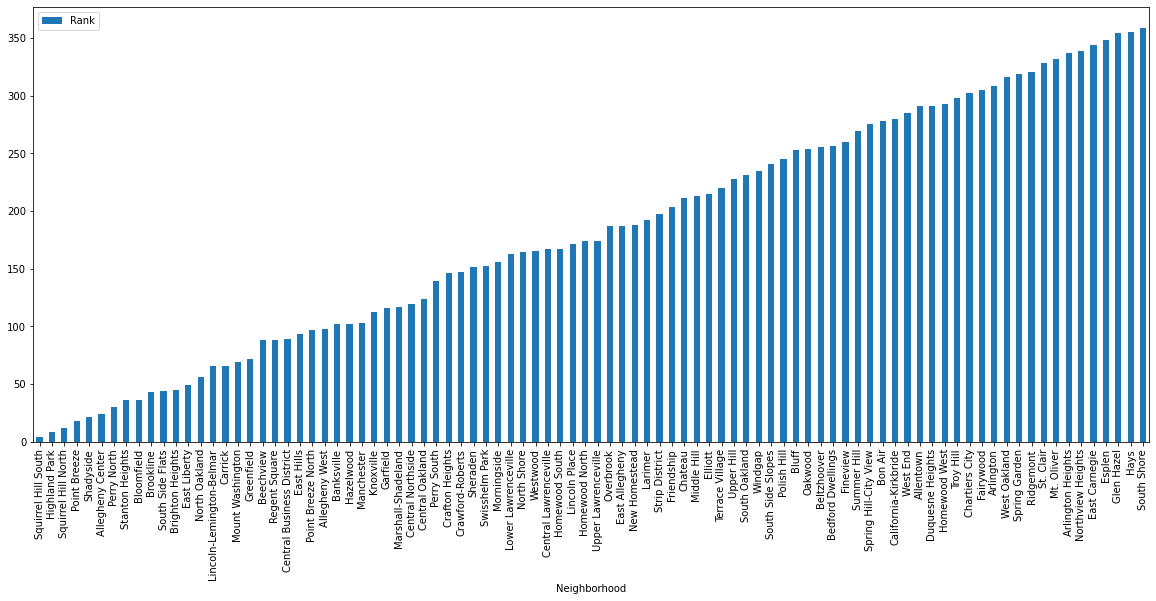

In [20]:
index = []
rank = [[]]
for i in range(90) :  
    index.append(i)
    
    rank[i].append(n[i])
    rank[i].append(nRank[i])
    
    rank.insert(i+1, [])
    
del rank[90]
    
rank = pd.DataFrame(rank,
                      columns = ['Neighborhood', 'Rank'], index=index)

rank.sort_values('Rank').plot.bar(x='Neighborhood', figsize=(20,8))

## Squirrel Hill South wins! And here's our top ten:

In [24]:
rank.sort_values("Rank").head(10)

,Neighborhood,Rank
76,Squirrel Hill South,4
39,Highland Park,8
75,Squirrel Hill North,12
62,Point Breeze,18
67,Shadyside,21
0,Allegheny Center,24
60,Perry North,30
78,Stanton Heights,36
9,Bloomfield,36
13,Brookline,43


<AxesSubplot:xlabel='Neighborhood'>

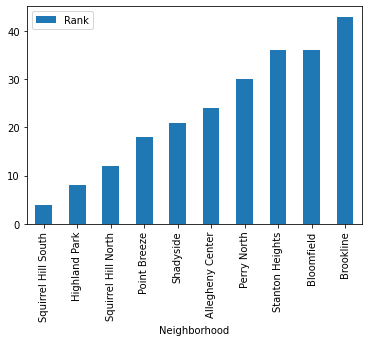

In [23]:
rank.sort_values("Rank").head(10).plot.bar(x="Neighborhood")